In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank

In [ ]:
frequency_sampling, audio_signal = wavfile.read("audio_output.wav")

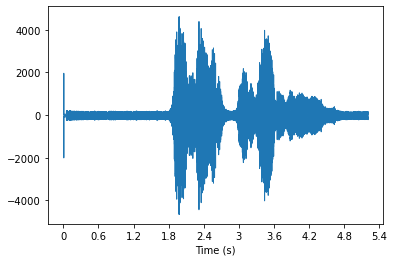

In [ ]:
pre_emphasis = 0.97
emphasized_signal = np.append(audio_signal[0], audio_signal[1:] - pre_emphasis * audio_signal[:-1]) 
librosa.display.waveshow(emphasized_signal, max_points=11025, x_axis='s')

MFCC:
Number of windows = 32
Length of each feature = 13


Text(0.5, 1.0, 'MFCC')

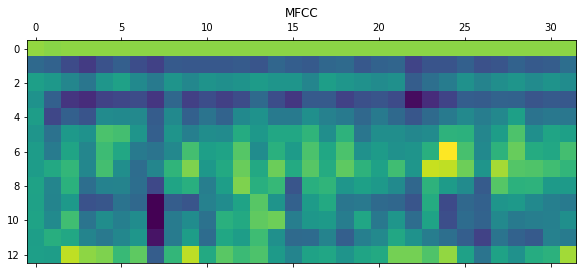

In [ ]:
audio_signal = audio_signal[:16000]

features_mfcc = mfcc(audio_signal, frequency_sampling)

print('MFCC:\nNumber of windows =', features_mfcc.shape[0])
print('Length of each feature =', features_mfcc.shape[1])

features_mfcc = features_mfcc.T
plt.matshow(features_mfcc)
plt.title('MFCC')

In [ ]:
features_mfcc = librosa.feature.mfcc(x, sr)

print('MFCC:\nNumber of windows =', features_mfcc.shape[0])
print('Length of each feature =', features_mfcc.shape[1])

librosa.display.specshow(features_mfcc, sr=sr, x_axis='time')
plt.title('MFCC')

Filter bank:
Number of windows = 32
Length of each feature = 26


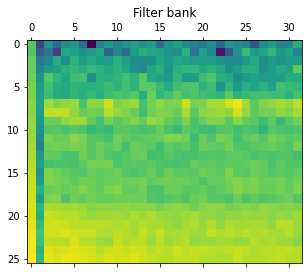

In [ ]:
filterbank_features = logfbank(audio_signal, frequency_sampling)

print('Filter bank:\nNumber of windows =', filterbank_features.shape[0])
print('Length of each feature =', filterbank_features.shape[1])

filterbank_features = filterbank_features.T
plt.matshow(filterbank_features)
plt.title('Filter bank')
plt.show()

In [ ]:
x, sr = librosa.load("audio_output.wav")

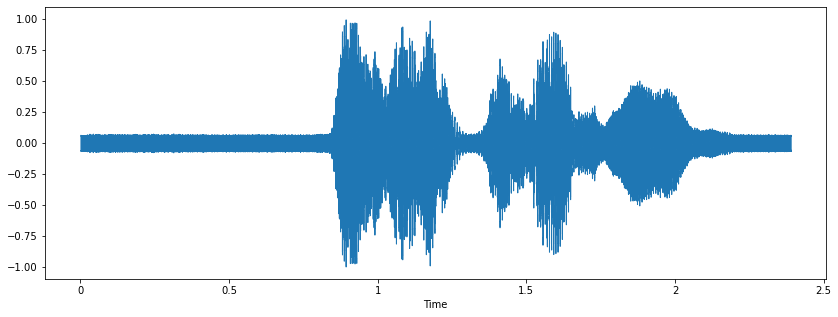

In [ ]:
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

C:\Users\HANSWA~1\AppData\Local\Temp/ipykernel_15192/819940035.py:3: FutureWarning: Pass y=[-0.04341222 -0.06550369 -0.05756679 ... -0.05823895 -0.06017824
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]


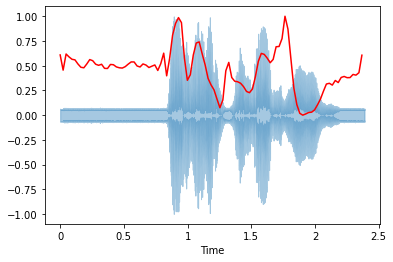

In [ ]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

C:\Users\HANSWA~1\AppData\Local\Temp/ipykernel_15192/2616464224.py:1: FutureWarning: Pass y=[-0.04341222 -0.06550369 -0.05756679 ... -0.05823895 -0.06017824
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]


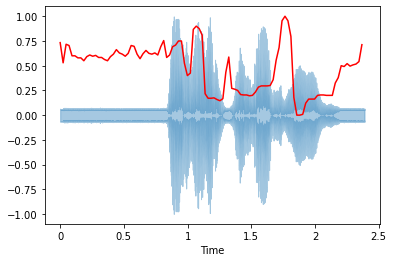

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')